### Sprint 8. Tasca del test d'hipòtesis

In [1]:
import pandas as pd
import seaborn as sns
import scipy

In [2]:
df=pd.read_csv('matches.csv',warn_bad_lines=True, error_bad_lines=False)
df.head(44)

/Users/psans/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9,11,17,24,28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,best_of,draw_size,loser_age,loser_entry,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,...,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed,year,Unnamed: 32
0,3,128,17.859001,NaN,R,NaN,200002,CRO,Mirjana Lucic,49.0,...,R,170.0,200001.0,SUI,Martina Hingis,1.0,6003.0,1.0,2000.0,NaN
1,3,128,27.118412,Q,R,NaN,200004,AUS,Kerry Anne Guse,133.0,...,R,167.0,200003.0,BEL,Justine Henin,63.0,510.0,NaN,2000.0,NaN
2,3,128,31.378508,NaN,R,NaN,200005,USA,Jolene Watanabe Giltz,118.0,...,R,NaN,200006.0,SVK,Karina Habsudova,53.0,574.0,NaN,2000.0,NaN
3,3,128,22.006845,NaN,R,NaN,200007,CRO,Silvija Talaja,23.0,...,R,182.0,200008.0,AUS,Alicia Molik,116.0,245.0,NaN,2000.0,NaN
4,3,128,24.821355,NaN,R,NaN,200010,ITA,Rita Grande,60.0,...,R,165.0,200009.0,THA,Tamarine Tanasugarn,72.0,439.0,NaN,2000.0,NaN
5,3,128,18.850103,NaN,R,180.0,200011,SLO,Katarina Srebotnik,66.0,...,R,NaN,200012.0,CAN,Jana Nejedly,84.0,347.0,NaN,2000.0,NaN
6,3,128,26.746064,Q,R,NaN,200014,ISR,Tzipi Obziler,214.0,...,R,NaN,200013.0,MEX,Angelica Gavaldon,320.0,52.0,NaN,2000.0,NaN
7,3,128,21.998631,NaN,R,NaN,200015,HUN,Petra Mandula,109.0,...,R,NaN,200016.0,FRA,Sandrine Testud,14.0,1635.0,12.0,2000.0,NaN
8,3,128,23.657769,NaN,R,NaN,200018,GER,Julia Abe,113.0,...,R,NaN,200017.0,ESP,Arantxa Sanchez Vicario,15.0,1558.0,13.0,2000.0,NaN
9,3,128,26.151951,Q,R,NaN,200019,FRA,Alexandra Fusai,177.0,...,R,165.0,200020.0,USA,Lisa Raymond,28.0,926.0,NaN,2000.0,NaN


##### De la base de dades solament em quedo amb les rondes finals i les edats i alçades

In [3]:
print(df['round'].value_counts())
df = df[df['round'].isin(['F', 'SF', 'QF'])]
print('comprovació que solament queden les finlas;\n',df['round'].value_counts())

R32     15903
R16      8559
R64      7269
R128     5744
RR       5530
QF       4292
SF       2186
F        1092
BR          1
Name: round, dtype: int64
comprovació que solament queden les finlas;
 QF    4292
SF    2186
F     1092
Name: round, dtype: int64


In [4]:
finals = df[['loser_age','winner_age', 'loser_ht', 'winner_ht','round']].reset_index()
finals = finals.drop('index', 1)
finals

,loser_age,winner_age,loser_ht,winner_ht,round
0,28.082136,19.296372,NaN,170.0,QF
1,24.358658,27.753593,NaN,170.0,QF
2,24.536619,23.802875,163.0,170.0,QF
3,29.352498,23.608487,NaN,189.0,QF
4,27.753593,19.296372,170.0,170.0,SF
...,...,...,...,...,...
7565,27.091034,32.991102,170.0,172.0,SF
7566,28.254620,23.537303,NaN,NaN,QF
7567,27.266256,23.879535,NaN,NaN,QF
7568,23.000684,32.991102,NaN,172.0,QF


In [5]:
finals.isnull().sum()

loser_age        0
winner_age       0
loser_ht      2318
winner_ht     1947
round            0
dtype: int64

In [6]:
finals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loser_age   7570 non-null   float64
 1   winner_age  7570 non-null   float64
 2   loser_ht    5252 non-null   float64
 3   winner_ht   5623 non-null   object 
 4   round       7570 non-null   object 
dtypes: float64(3), object(2)
memory usage: 295.8+ KB


In [7]:
# Hi ha algun valor que no es pot convertir en número. Amb aquest loop despareix.
#Sense aquest pas no es podia fer la mitjana
result = []
for x in finals['winner_ht']:
    try:
        result.append(float(x))
    except:
        result.append('not a float')
finals['winner_ht']=result

In [8]:
finals['winner_ht'].mean()

174.3524808820914

In [9]:
finals.isnull().sum()

loser_age        0
winner_age       0
loser_ht      2318
winner_ht     1947
round            0
dtype: int64

##### Normalitzo els valors nuls a les alçades amb la mitjana i ho converteixo a nums sencers

In [10]:
finals=finals.fillna(finals.mean())

In [11]:
finals['winner_ht']=finals['winner_ht'].astype(int)
finals['loser_ht']=finals['loser_ht'].astype(int)

#l'edat l'arrodoneixo també cap a munt amb round (23,8 = 24)
finals['loser_age']=round(finals['loser_age']).astype(int)
finals['winner_age']=round(finals['winner_age']).astype(int)

In [12]:
finals.head(15)

,loser_age,winner_age,loser_ht,winner_ht,round
0,28,19,173,170,QF
1,24,28,173,170,QF
2,25,24,163,170,QF
3,29,24,173,189,QF
4,28,19,170,170,SF
5,24,24,170,189,SF
6,19,24,170,189,F
7,24,20,168,170,QF
8,26,25,173,178,QF
9,20,28,185,174,QF


##### Visualització gràfica que mostra que les dades no són gausianes

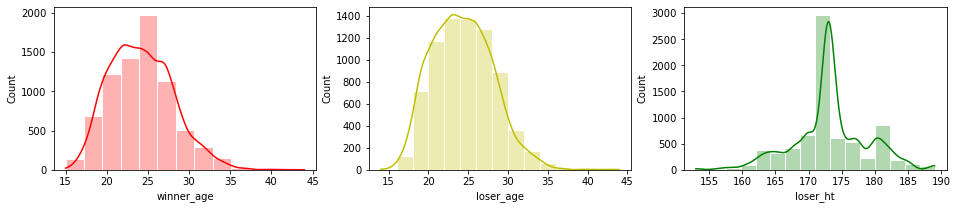

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(16,3))

sns.histplot(x='winner_age', data=finals, color='r', ax=ax[0], kde=True , edgecolor="w", alpha=.3, 
             bins=finals['winner_age'].nunique()//2)
sns.histplot(x='loser_age', data=finals, color='y', alpha=.3, ax=ax[1],kde=True, edgecolor="w",
              bins=finals['loser_age'].nunique()//2)
sns.histplot(x='loser_ht', data=finals, color='g', alpha=.3, ax=ax[2],kde=True, edgecolor="w",
              bins=finals['loser_ht'].nunique()//2)

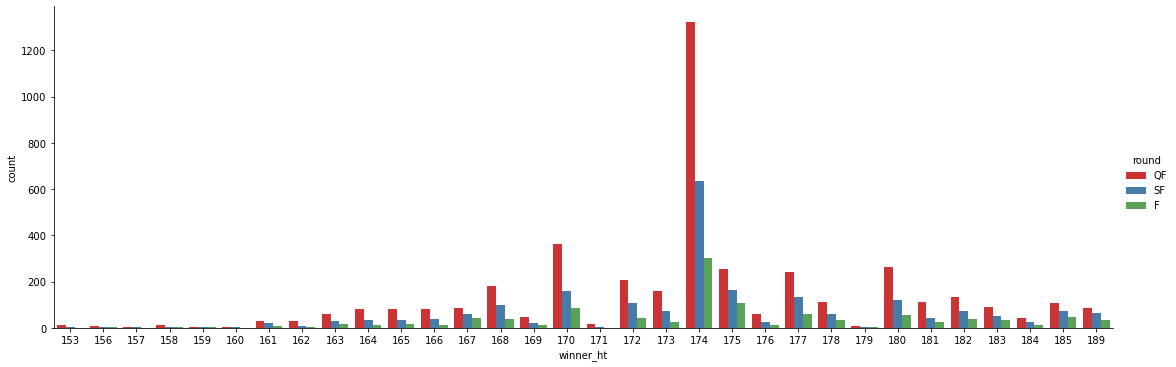

In [31]:
sns.catplot(x="winner_ht", kind="count", data=finals, hue = 'round',height=5, aspect=3.1, palette="Set1")

In [15]:
from scipy.stats import shapiro, normaltest, anderson, wilcoxon, mannwhitneyu, stats

##### Amb diferents mètodes també queda provat que nes dades no tenen una distribució normal

In [28]:
#from scipy.stats import shapiro
stat, p = shapiro(finals['winner_age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Tenen, probablement, una distribució normal')
else:
	print('Probablement no tenen una distribució normal')

Statistics=0.980, p=0.000
Probablement no tenen una distribució normal


In [17]:
#from scipy.stats import 
stat, p = normaltest(finals['winner_ht'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Tenen, probablement, una distribució normal')
else:
	print('Probablement no tenen una distribució normal')

stat=77.738, p=0.000
Probablement no tenen una distribució normal


In [18]:
#from scipy.stats import anderson
result = anderson(finals['loser_ht'])
print('stat=%.3f' % (result.statistic))
print('p-value: ',p)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probablement gausiana al nivell %.1f%%' % (sl))
	else:
		print('Probablement no gausiana al nivell %.1f%% level' % (sl))

stat=182.207
p-value:  1.3167161198860269e-17
Probablement no gausiana al nivell 15.0% level
Probablement no gausiana al nivell 10.0% level
Probablement no gausiana al nivell 5.0% level
Probablement no gausiana al nivell 2.5% level
Probablement no gausiana al nivell 1.0% level


In [19]:
finals['loser_ht'].mean()

173.2889035667107

##### Exercici 1
Busco el valor-p, faig servir el Wilcoxon Test perquè no té distribució normal

In [20]:
w, p = wilcoxon(finals['loser_ht'])
print('p-value: ',p)
if p > 0.05:
	print('Té, probablement, una distribució normal')
else:
	print('No té, probablement, una distribució normal')

p-value:  0.0
No té, probablement, una distribució normal


##### Exercici 2
Comparo les columnes de les edats de les guanyadores i les perdedores i prenc com a hipòtesi que sí tenen una mateixa distribució (encara que no gausaina)

In [21]:
stat, p = mannwhitneyu(finals['winner_age'], finals['loser_age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mateixa distribució (Acceptem la hipòtesi nula)')
else:
    print('Distribució diferent (Rebutgem la hipòtesi nula)')

Statistics=28394564.000, p=0.168
Mateixa distribució (Acceptem la hipòtesi nula)


##### Exercici 3
Agafo la columna  de les alçades de les guanyadores i comparo la distribució entre els quarts de final, semifinals i finals. 

In [22]:
aa=finals['winner_ht'][finals['round'].isin(['F'])]
bb=finals['winner_ht'][finals['round'].isin(['SF'])]
cc=finals['winner_ht'][finals['round'].isin(['QF'])]

In [26]:
stat3, p3 = stats.kruskal(aa,bb,cc)

In [27]:
if p3 > alpha:
    print('Mateixa distribució (Acceptem la hipòtesi nula)')
else:
    print('Distribució diferent (Rebutgem la hipòtesi nula)')

Distribució diferent (Rebutgem la hipòtesi nula)
